In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [15]:
sign_mnist_df = pd.concat(
    objs= [pd.read_csv('sign_mnist_train.csv'),pd.read_csv('sign_mnist_test.csv')],
    axis=0
).reset_index(drop = True)

y = sign_mnist_df['label']
X = sign_mnist_df.drop(columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size= 0.65,
                                                    test_size= 0.35, 
                                                    random_state= 101)
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [52]:
pd.DataFrame(y_train.value_counts().sort_index())

,label
0,961
1,924
2,933
3,930
4,946
5,937
6,933
7,957
8,941
10,938


Text(0.5, 1.0, 'Frequency of Letter for Training Set')

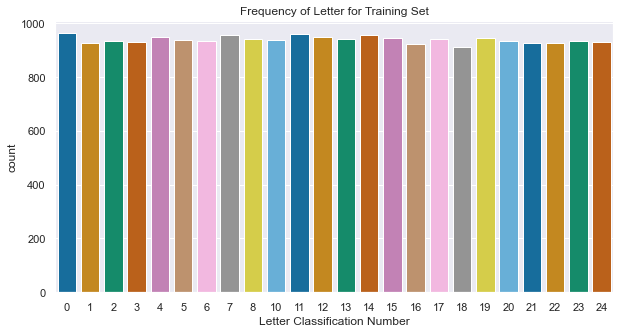

In [63]:
plt.figure(figsize = (10,5))
sns.countplot(y_train,palette='colorblind')
plt.xlabel('Letter Classification Number')
plt.title('Frequency of Letter for Training Set')


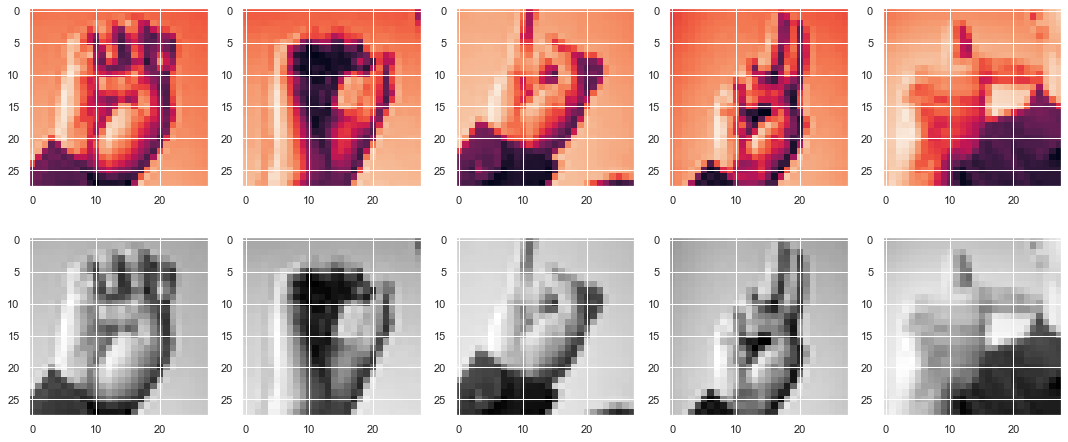

In [127]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(15, 7)
for i in range(2):
    k = 0
    if i == 0:
        for j in range(5):
            ax[i,j].imshow(X_train[k].reshape(28, 28))
            k += 1
    else:
        for j in range(5):
            ax[i,j].imshow(X_train[k].reshape(28, 28), cmap = 'gray')
            k += 1
    plt.tight_layout()   

In [92]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Metal device set to: Apple M2


2022-07-16 20:39:42.744790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-16 20:39:42.746542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [97]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

## Running Neural Network

In [102]:
history = model.fit(x=X_train,
                    y=y_train ,
                    epochs = 20 , 
                    validation_data = (X_test, y_test))

Epoch 1/20
704/704 [==============================] - 20s 28ms/step - loss: 0.3836 - accuracy: 0.8870 - val_loss: 0.0893 - val_accuracy: 0.9749
Epoch 2/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0185 - accuracy: 0.9953 - val_loss: 0.0062 - val_accuracy: 0.9995
Epoch 3/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 4/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.1458 - val_accuracy: 0.9538
Epoch 5/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.1404 - val_accuracy: 0.9516
Epoch 6/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 7/20
704/704 [==============================] - 19s 27ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.0032 - val_accuracy:

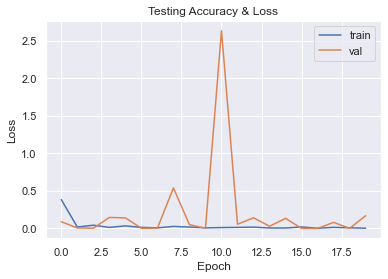

In [116]:
plt.title('Testing & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

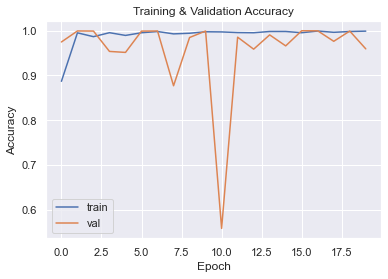

In [115]:
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

## Running Neural Network with Artifically Expanding Data Set

In [117]:
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [119]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [120]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [121]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 128),
                    epochs = 20,
                    validation_data = (X_test, y_test),
                    callbacks = [learning_rate_reduction])

Epoch 1/20
176/176 [==============================] - 13s 69ms/step - loss: 0.3421 - accuracy: 0.9284 - val_loss: 0.0017 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 2/20
176/176 [==============================] - 11s 65ms/step - loss: 0.0903 - accuracy: 0.9716 - val_loss: 2.8437e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
176/176 [==============================] - 11s 65ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 9.3932e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/20
175/176 [============================>.] - ETA: 0s - loss: 0.0395 - accuracy: 0.9870
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
176/176 [==============================] - 11s 65ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0024 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 5/20
176/176 [==============================] - 11s 64ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.0014 - val_accuracy: 0.9999 - lr: 5.0000e-04
Epoch 6/20
175/176 [======================

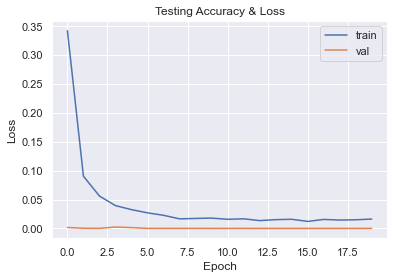

In [122]:
plt.title('Testing Accuracy & Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

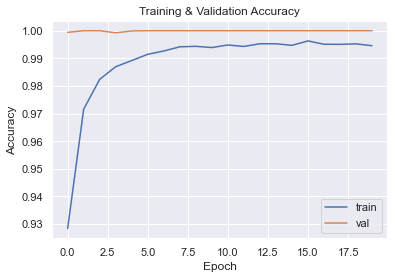

In [123]:
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()